In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('indian_liver_patient.csv')

In [4]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [5]:
avg_AGR = df["Albumin_and_Globulin_Ratio"].astype("float").mean(axis=0)
df["Albumin_and_Globulin_Ratio"].replace(np.nan, avg_AGR, inplace =True)

#df.isnull().sum()

In [12]:
#df_categ=pd.get_dummies(df, columns=['Gender']).head()

In [35]:
#X = df_categ.drop('Dataset', axis =1).copy()


In [38]:
df.shape

(583, 11)

In [39]:
X = df.drop('Dataset', axis=1).copy()

In [44]:
X.head(7)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00


In [45]:
X= pd.get_dummies(X, columns=['Gender'])

In [47]:
X.shape

(583, 11)

In [19]:
df_categ.dtypes

Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
Gender_Female                   uint8
Gender_Male                     uint8
dtype: object

In [30]:

y=df['Dataset'].copy()

In [48]:
y.shape

(583,)

In [67]:
X_scaled=scale(X)

In [69]:
X_scaled

array([[ 1.25209764, -0.41887783, -0.49396398, ..., -0.14789798,
         1.76228085, -1.76228085],
       [ 1.06663704,  1.22517135,  1.43042334, ..., -0.65069686,
        -0.56744644,  0.56744644],
       [ 1.06663704,  0.6449187 ,  0.93150811, ..., -0.17932291,
        -0.56744644,  0.56744644],
       ...,
       [ 0.44843504, -0.4027597 , -0.45832717, ...,  0.16635131,
        -0.56744644,  0.56744644],
       [-0.84978917, -0.32216906, -0.35141677, ...,  0.16635131,
        -0.56744644,  0.56744644],
       [-0.41704777, -0.37052344, -0.42269037, ...,  1.73759779,
        -0.56744644,  0.56744644]])

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,random_state=42)

In [73]:
X_train


array([[ 1.00481684, -0.4027597 , -0.49396398, ...,  0.16635131,
        -0.56744644,  0.56744644],
       [ 1.06663704,  0.56432805,  0.53950329, ..., -0.14789798,
        -0.56744644,  0.56744644],
       [ 0.51025524, -0.27381467, -0.20886956, ...,  1.73759779,
        -0.56744644,  0.56744644],
       ...,
       [-0.47886797, -0.41887783, -0.45832717, ...,  0.16635131,
        -0.56744644,  0.56744644],
       [-1.71527197, -0.45111409, -0.49396398, ...,  2.36609638,
         1.76228085, -1.76228085],
       [-1.71527197, -0.38664157, -0.45832717, ...,  1.89472243,
        -0.56744644,  0.56744644]])

In [74]:
y_train.head(10)

231    1
22     1
423    2
116    1
89     1
452    1
564    2
18     1
271    2
309    1
Name: Dataset, dtype: int64

In [75]:
print(format(sum(y_train==1)))

307


In [76]:
print(format(sum(y_train==2)))

130


In [77]:
from imblearn.over_sampling import SMOTE

In [80]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [81]:
from sklearn.svm import SVC

In [84]:
clf1_svm =SVC(kernel='linear', random_state=0)
clf1_svm.fit(X_train_res,y_train_res)

SVC(kernel='linear', random_state=0)

In [85]:
from sklearn.metrics import accuracy_score

In [87]:
predict=clf1_svm.predict(X_test)
accuracy_score(y_test, predict)

0.6027397260273972

In [88]:
from sklearn.metrics import plot_confusion_matrix

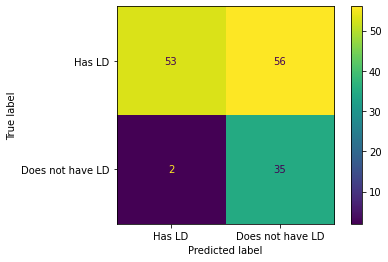

In [89]:
plot_confusion_matrix(clf1_svm, X_test,y_test, display_labels=['Has LD','Does not have LD'])

In [90]:
from sklearn.metrics import classification_report

In [92]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           1       0.96      0.49      0.65       109
           2       0.38      0.95      0.55        37

    accuracy                           0.60       146
   macro avg       0.67      0.72      0.60       146
weighted avg       0.82      0.60      0.62       146

